this notebook does some spot checking on learned weight patterns in `scripts/training/yuanyuan_8k_a_3day/feature_approximation/local_pcn_recurrent/submit_sep2.py`.

In [1]:
from IPython.display import HTML, display

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from thesis_v2 import dir_dict
from thesis_v2.training.training_aux import load_training_results

In [4]:
from sys import path
from os.path import join, exists, dirname
from os import makedirs



In [5]:
folder_to_check = 'scripts/training/imagenet_val/feature_approximation/local_pcn_original_imagenet'
path.insert(0, join(dir_dict['root'], folder_to_check))
from submit_sep2 import param_iterator

In [6]:
from numpy.linalg import norm
import numpy as np

In [7]:
from pickle import load

In [8]:
def load_one_result(filename):
    with open(filename, 'rb') as f:
        return load(f)

In [9]:
# create dir
global_vars = {
    'save_dir': join(dir_dict['analyses'],
                     'scripts+imagenet_val+feature_approximation_lpcn_original_sep2',
                    'pca')
}

In [10]:
from math import sqrt
from torchvision.utils import make_grid
from torch import tensor

In [11]:
def do_analysis(label_fname_list):
    for label, fname in label_fname_list:
        print(label)
        data = load_one_result(fname)
#         for x, y in data.items():
#             print(x, y.dtype, y.shape)
        
        
        # ok. what to show here?
        # first, let's reshape `components`.
        components = data['components']
        assert components.ndim == 2
        n_el_per_filter = components.shape[1]
        kernel_size = round(sqrt(n_el_per_filter))
        assert type(kernel_size) is int and kernel_size**2 == n_el_per_filter
        components = components.reshape(components.shape[0], 1, kernel_size, kernel_size)
        
        # this components is ready to be displayed using pytorch's util
        components_grid = make_grid(tensor(components[:20]), nrow=10,normalize=True, scale_each=True)
        components_grid = components_grid.numpy().transpose(1, 2, 0)
        print(np.cumsum(data['explained_variance_ratio'])[:20])
        plt.close('all')
        plt.figure(figsize=(8,6))
        plt.imshow(components_grid,vmin=0.0,vmax=1.0,interpolation='none')
        plt.show()
        

In [12]:
def collect_all():
    save_dir = global_vars['save_dir']
    count = 0
    verbose = True
    for idx, data in enumerate(param_iterator()):
        
        if idx % 4 == 0:
            display(HTML(f'<h1>conv {idx//4+1} visualizations</h1>'))
        
        count += 1
        
#         if data['param_dict_actual']['basemodel_idx'] in (1,2):
#             # seems too much memory and jobs crashed on mind. not available.
#             continue
        
    
    
        key = data['key_this_original']
        
        def filename_gen(x):
            return join(save_dir, f'{idx}/unit_norm', f'{x}.pkl')
        
        filename_set = {'ff', 'lateral', 'all'}
        if not all([exists(filename_gen(x)) for x in filename_set]):
            # right now if partially done, the partial results will be fully overwritten.
            continue
            raise RuntimeError('bug!')
        
        if verbose:
            print(key)
            
            # load lateral one
            do_analysis([(x, filename_gen(x)) for x in [
                'lateral','ff',
                # remove this, confusing.
#                 'all'
            ]
                        ])
        
        
    print(count)


imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx0/actrelu/lossmse/k9/bn_preTrue/model_seed0
lateral
[0.22194065 0.31443808 0.3954293  0.47086741 0.51797408 0.56121569
 0.59626553 0.6306388  0.66036865 0.68691963 0.71291789 0.73517898
 0.75495449 0.7742788  0.79007513 0.80358888 0.81620835 0.82801195
 0.8389978  0.84868836]


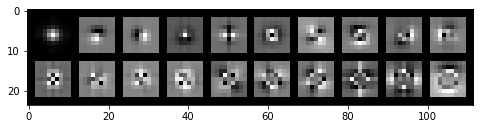

ff
[0.26902227 0.3777577  0.45848392 0.52655012 0.56440439 0.59999049
 0.63484185 0.66534808 0.69191891 0.71544407 0.73691106 0.75615178
 0.77271977 0.78835521 0.80279161 0.81554557 0.82792952 0.83945696
 0.8498024  0.85960541]


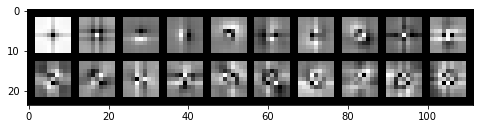

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx0/actrelu/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.17419188 0.24733301 0.28856518 0.32284099 0.35115296 0.3734402
 0.39210432 0.41027358 0.42826796 0.44484576 0.46085123 0.47396193
 0.48631876 0.49860307 0.51058112 0.52244632 0.53407046 0.54520196
 0.55573556 0.56618401]


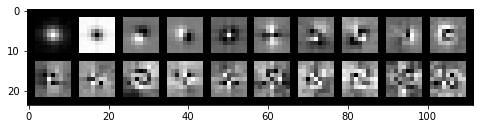

ff
[0.33488039 0.4209617  0.47179607 0.50426293 0.53165856 0.55147799
 0.56722336 0.58269246 0.5974695  0.61087175 0.62262603 0.63333847
 0.64393611 0.65359177 0.66310817 0.67210128 0.68047974 0.68877795
 0.69650775 0.70405539]


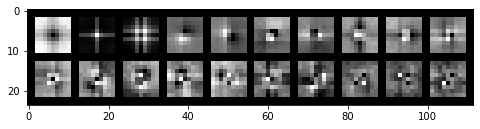

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx0/actsoftplus/lossmse/k9/bn_preTrue/model_seed0
lateral
[0.21791333 0.30789138 0.38685226 0.46221382 0.50886056 0.55292451
 0.58847865 0.62317003 0.65287155 0.67947381 0.70548962 0.72764932
 0.74785107 0.76735874 0.78350824 0.79711706 0.80974901 0.82194272
 0.8333453  0.84368481]


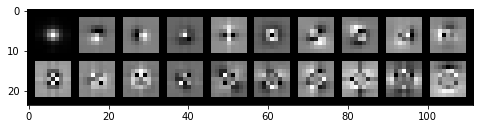

ff
[0.28895105 0.39285806 0.47100552 0.53543394 0.57398556 0.60847062
 0.64245494 0.67152703 0.69866047 0.72138785 0.74338478 0.76275361
 0.77882199 0.79427789 0.8080976  0.8205024  0.8323917  0.84401816
 0.85441693 0.86432807]


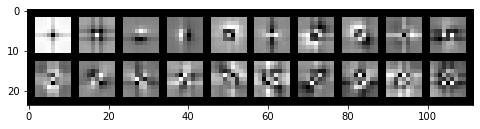

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx0/actsoftplus/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.17839376 0.26158306 0.30711202 0.3464944  0.38027649 0.40957877
 0.43159544 0.4517129  0.47143508 0.48989327 0.50791926 0.52318516
 0.53712149 0.55041746 0.56327884 0.57563868 0.58700369 0.59795324
 0.60866509 0.6191224 ]


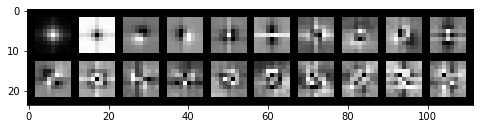

ff
[0.33512563 0.42835817 0.48139153 0.51737542 0.55044866 0.5757637
 0.59747427 0.61475993 0.63041141 0.64521694 0.65736413 0.66852525
 0.67954937 0.68968371 0.69912524 0.70852651 0.7173549  0.72540888
 0.7328349  0.74016274]


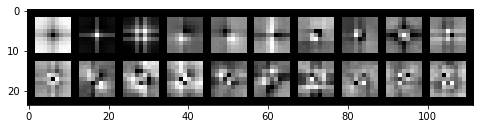

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx1/actrelu/lossmse/k9/bn_preTrue/model_seed0
lateral
[0.14782647 0.23572756 0.31963962 0.39896384 0.46355345 0.51015348
 0.55447567 0.59718709 0.63789495 0.67155076 0.70258053 0.73251616
 0.75975563 0.7774135  0.79371584 0.80950163 0.82459285 0.83716867
 0.84919134 0.86079588]


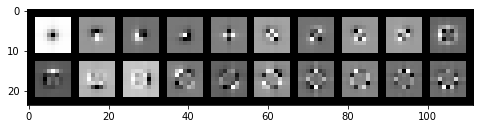

ff
[0.15502353 0.24312545 0.32234491 0.39895485 0.45838998 0.49463782
 0.52982315 0.5635152  0.59521253 0.62610458 0.65599627 0.68314013
 0.70912871 0.72615837 0.74272004 0.7578273  0.77216897 0.78582566
 0.79808182 0.8096122 ]


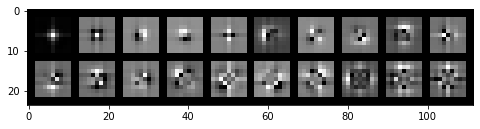

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx1/actrelu/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.4075489  0.42741825 0.44514534 0.46106457 0.47289719 0.48337957
 0.49340787 0.5026805  0.51155615 0.5202669  0.52862974 0.5367996
 0.54483496 0.55277723 0.5606328  0.56844982 0.57615826 0.58384093
 0.59146973 0.59901803]


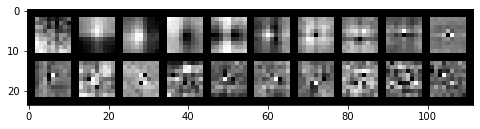

ff
[0.46069021 0.49298173 0.51402296 0.53175316 0.54221332 0.55171008
 0.56054487 0.56863582 0.57633398 0.58392225 0.59142174 0.59881212
 0.60595741 0.61300794 0.61999083 0.62689371 0.63376032 0.64059256
 0.64739012 0.6541644 ]


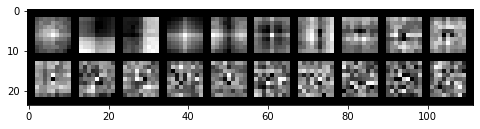

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx1/actsoftplus/lossmse/k9/bn_preTrue/model_seed0
lateral
[0.14837124 0.23634727 0.32020668 0.39954656 0.46414807 0.51073666
 0.55503653 0.59777922 0.63840179 0.67202228 0.7030358  0.73290281
 0.76016101 0.77777788 0.79406929 0.80980322 0.82486713 0.83744604
 0.84945692 0.86103169]


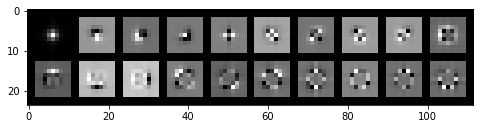

ff
[0.15274323 0.24123999 0.32055301 0.39690736 0.45696117 0.49266763
 0.52788012 0.56145267 0.59317581 0.62424372 0.65420616 0.68133531
 0.70731174 0.72437943 0.74118685 0.7563164  0.77075117 0.78415537
 0.7962977  0.80783954]


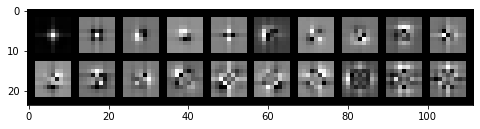

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx1/actsoftplus/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.38641743 0.43406063 0.46925154 0.50273482 0.52641502 0.54886286
 0.56860925 0.58802806 0.60306198 0.61691753 0.63020465 0.6426895
 0.65503821 0.66696738 0.67684685 0.68657328 0.69586003 0.7048334
 0.71353557 0.72185003]


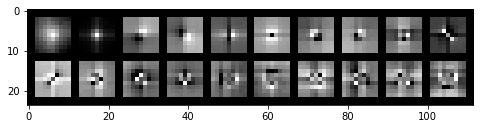

ff
[0.46510974 0.52823371 0.5691033  0.60562289 0.62594315 0.6454126
 0.66090722 0.67540109 0.68704672 0.69831699 0.70795222 0.71655459
 0.72469625 0.73264606 0.74040534 0.74776728 0.7548513  0.76150915
 0.76804481 0.77437414]


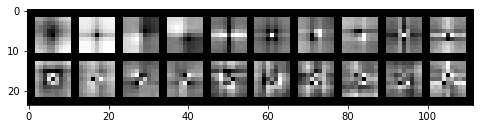

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx2/actrelu/lossmse/k9/bn_preTrue/model_seed0
lateral
[0.16347164 0.25676717 0.34442485 0.42365059 0.48096157 0.53342654
 0.57133669 0.60737579 0.64228659 0.67057402 0.69871282 0.7254008
 0.75155687 0.76918783 0.7861122  0.80219764 0.81730316 0.8311301
 0.8425835  0.85363114]


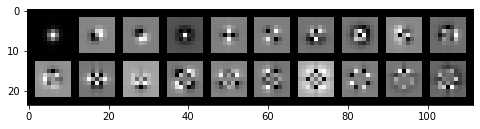

ff
[0.14034085 0.2156787  0.28919045 0.35894153 0.40912405 0.45314723
 0.49123964 0.52566146 0.55853993 0.58915353 0.6178712  0.64597139
 0.67338566 0.69271638 0.71159442 0.729746   0.74701285 0.76082436
 0.7741006  0.78603142]


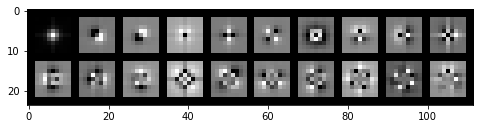

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx2/actrelu/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.2325923  0.27375513 0.3056386  0.33493942 0.35729137 0.37803791
 0.39723765 0.41561467 0.43253595 0.44828343 0.46195728 0.47522207
 0.48833812 0.50045566 0.51228762 0.52393192 0.53534664 0.54627754
 0.55672425 0.56693215]


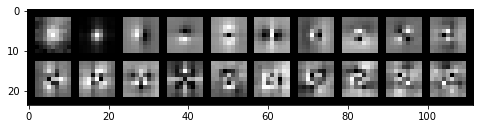

ff
[0.36345637 0.40080347 0.43275487 0.46176035 0.47979513 0.49689419
 0.51346493 0.52948262 0.54258003 0.55545821 0.56753587 0.57890235
 0.58960365 0.60008435 0.61035444 0.62005278 0.62935929 0.63828664
 0.64696022 0.65544857]


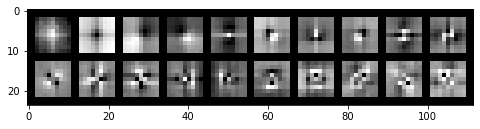

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx2/actsoftplus/lossmse/k9/bn_preTrue/model_seed0
lateral
[0.16352407 0.25683963 0.34452158 0.4237632  0.48107802 0.5335428
 0.57144627 0.60749071 0.64239225 0.67068089 0.69881942 0.72550634
 0.75165783 0.76928146 0.78619963 0.80228126 0.81738273 0.83120687
 0.84265484 0.85369989]


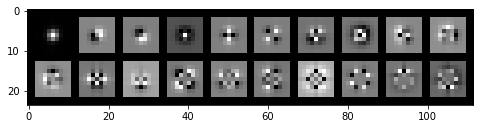

ff
[0.14042755 0.21583063 0.28936443 0.35931215 0.40948918 0.45351584
 0.49163542 0.52604544 0.5589121  0.58947496 0.61818675 0.6462775
 0.67368532 0.69298256 0.71186618 0.73000375 0.74726216 0.76107357
 0.77434415 0.78626451]


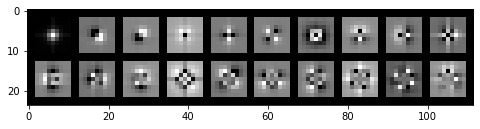

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx2/actsoftplus/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.16441896 0.25147635 0.33495585 0.41514968 0.46760843 0.51510072
 0.55972817 0.59408683 0.625968   0.65178474 0.67746897 0.70246753
 0.72700754 0.74755295 0.76376723 0.77973225 0.79470221 0.8077283
 0.8202281  0.83067271]


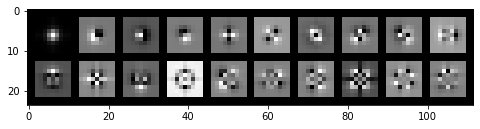

ff
[0.19066137 0.28608697 0.35060855 0.41346799 0.45992144 0.5023374
 0.5387763  0.56922685 0.59821142 0.62601168 0.65038821 0.67392865
 0.69691366 0.71875051 0.73407583 0.74921715 0.76416262 0.77859405
 0.7893835  0.7998459 ]


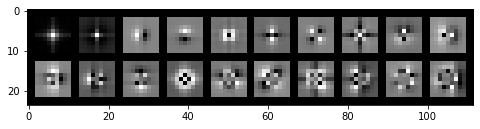

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx3/actrelu/lossmse/k9/bn_preTrue/model_seed0
lateral
[0.16052296 0.2505998  0.33878589 0.4122363  0.46967735 0.52039776
 0.5594326  0.59570168 0.63147132 0.66235857 0.69296365 0.72171024
 0.74518674 0.76353764 0.77973802 0.79502007 0.80892876 0.82230416
 0.83319416 0.84360545]


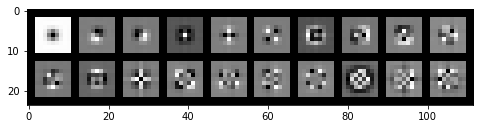

ff
[0.23617074 0.35061706 0.46257172 0.57120098 0.63440609 0.68730955
 0.72406434 0.75906783 0.79341587 0.81851761 0.83606808 0.85249534
 0.86740591 0.87711989 0.88626596 0.8939881  0.90128809 0.90723144
 0.91219946 0.91701483]


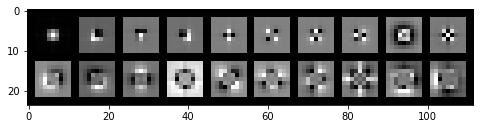

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx3/actrelu/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.3563211  0.4033606  0.44330202 0.4746396  0.48911847 0.50069731
 0.51178349 0.52255715 0.53307485 0.54247804 0.55116144 0.55969376
 0.56795933 0.57616542 0.5841634  0.59197135 0.59968597 0.60713637
 0.61458341 0.62186447]


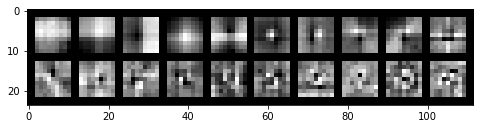

ff
[0.4840761  0.5276838  0.55962988 0.58076018 0.59215052 0.60212414
 0.61131974 0.62040526 0.62888895 0.63606385 0.64296383 0.64977239
 0.65636842 0.66289216 0.6692967  0.67542785 0.68151826 0.68753444
 0.69345314 0.69928403]


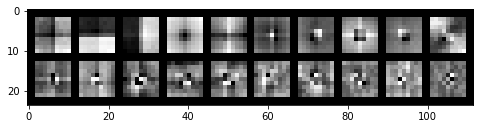

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx3/actsoftplus/lossmse/k9/bn_preTrue/model_seed0
lateral
[0.16064271 0.25067274 0.33877531 0.41227992 0.46970545 0.52042805
 0.55947124 0.59572441 0.63149826 0.6623805  0.69299767 0.72174805
 0.74523775 0.76358331 0.77977298 0.79504171 0.80894022 0.82230405
 0.83319274 0.84360561]


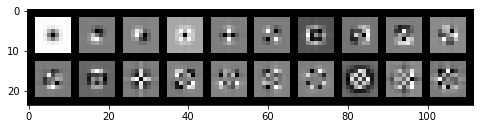

ff
[0.23667417 0.35118931 0.4634466  0.57212771 0.63533028 0.68806398
 0.72476605 0.75972173 0.79400922 0.81907614 0.83659721 0.8529931
 0.86784968 0.87750553 0.88661418 0.89431963 0.90160438 0.90756102
 0.91251672 0.9173241 ]


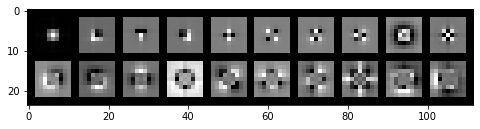

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx3/actsoftplus/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.30688037 0.39042876 0.43931738 0.48355076 0.5206378  0.54879286
 0.57481868 0.59747872 0.61946976 0.63875748 0.65501448 0.67037334
 0.68527016 0.6995534  0.71354674 0.72708953 0.73725104 0.74659976
 0.75570815 0.76470808]


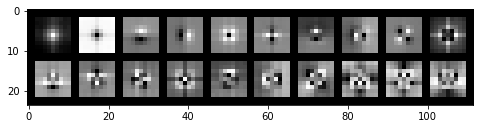

ff
[0.38018982 0.47917831 0.52939627 0.576813   0.6231955  0.65277979
 0.67831076 0.69923304 0.7189804  0.73574927 0.75152726 0.76635924
 0.77892947 0.79105612 0.79984657 0.80767757 0.81507542 0.82224163
 0.82902852 0.83562658]


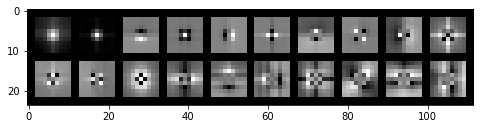

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx4/actrelu/lossmse/k9/bn_preTrue/model_seed0
lateral
[0.19079808 0.2792452  0.36223371 0.43780329 0.49675077 0.54697937
 0.58297348 0.61703797 0.64940079 0.67964836 0.70902041 0.73651715
 0.75876561 0.77608274 0.79066499 0.80478867 0.81843249 0.82988384
 0.84004654 0.84963343]


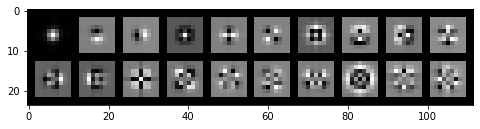

ff
[0.19625134 0.29501748 0.38935993 0.48046265 0.53186383 0.58167013
 0.61804939 0.64845067 0.67782345 0.70280119 0.72683192 0.74964549
 0.76724452 0.78309624 0.7965378  0.80944611 0.82200654 0.83208915
 0.84137422 0.85050847]


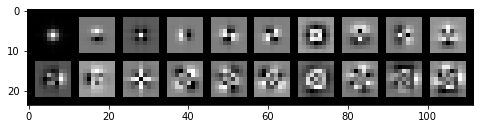

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx4/actrelu/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.24272684 0.30125611 0.33069555 0.35766435 0.38076202 0.39995632
 0.41813027 0.4352227  0.45174172 0.4664689  0.47959708 0.49246233
 0.5050296  0.5168535  0.52855597 0.53961192 0.55033794 0.56076762
 0.57044138 0.57992642]


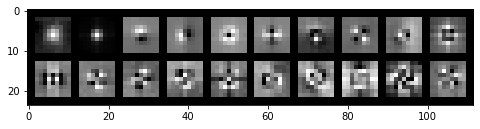

ff
[0.39779954 0.45366431 0.49113536 0.52390997 0.55311928 0.57381981
 0.59261357 0.60919931 0.62425442 0.63762504 0.64989002 0.66030643
 0.67044296 0.68020909 0.68969163 0.69875676 0.70763806 0.71564172
 0.72350415 0.73103781]


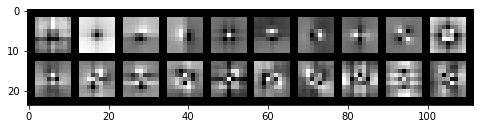

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx4/actsoftplus/lossmse/k9/bn_preTrue/model_seed0
lateral
[0.19006288 0.27806304 0.36097722 0.43633632 0.49525988 0.54550917
 0.58157612 0.61572256 0.64818115 0.67851523 0.70794572 0.73552696
 0.75786093 0.7752857  0.78991745 0.80413205 0.81779204 0.82918225
 0.83939154 0.84903755]


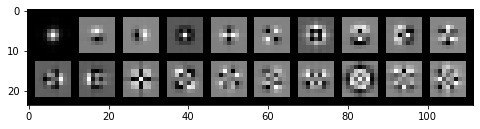

ff
[0.1964058  0.29511871 0.39107872 0.48221102 0.53376641 0.58373807
 0.62010519 0.65043499 0.67974501 0.70466612 0.72873282 0.75164555
 0.76924874 0.78500544 0.79844391 0.81124901 0.82369859 0.8337238
 0.84294483 0.8520096 ]


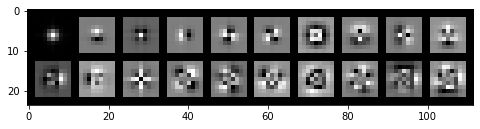

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx4/actsoftplus/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.25167825 0.31029973 0.34105789 0.36843756 0.39118726 0.41136616
 0.43083841 0.44778257 0.46385988 0.47862359 0.49184716 0.50447163
 0.51697371 0.52906061 0.5409863  0.55197088 0.56243863 0.57278195
 0.5825408  0.59180839]


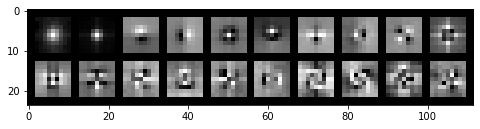

ff
[0.39852382 0.46486278 0.50359255 0.53607702 0.56483934 0.58603485
 0.60534163 0.62300057 0.63754651 0.65172008 0.66486635 0.67537352
 0.68551975 0.69555791 0.70514021 0.71397324 0.7226534  0.73080132
 0.73848343 0.7460193 ]


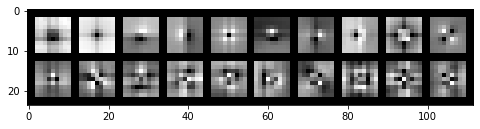

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx5/actrelu/lossmse/k9/bn_preTrue/model_seed0
lateral
[0.15074738 0.22585318 0.29479617 0.35575161 0.40064509 0.43835464
 0.47055918 0.50007453 0.52727179 0.55204146 0.57570448 0.59903702
 0.61984472 0.63508359 0.64859449 0.66170645 0.67376904 0.68577567
 0.69626196 0.70615147]


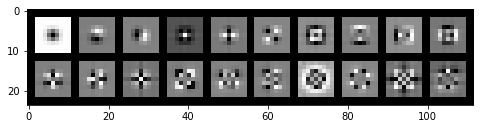

ff
[0.24643157 0.36263634 0.47359951 0.57870881 0.63591347 0.68387692
 0.71439465 0.74422159 0.7672355  0.78787452 0.80072379 0.81272537
 0.82278806 0.83092283 0.83888535 0.84551087 0.85174964 0.85746975
 0.86280561 0.86804645]


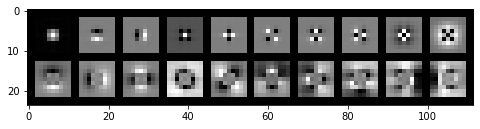

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx5/actrelu/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.34681199 0.39623416 0.43460441 0.46733462 0.48337718 0.49544775
 0.50679228 0.51772693 0.52799384 0.5373189  0.54638501 0.55516759
 0.56378667 0.57233347 0.58077936 0.58856141 0.59612646 0.60366713
 0.61091248 0.61810325]


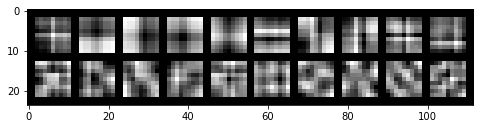

ff
[0.34828773 0.41749458 0.46199891 0.49029859 0.5066361  0.51821402
 0.52847739 0.53832911 0.547773   0.55689668 0.56485244 0.57275812
 0.58055855 0.58805903 0.59544929 0.60272249 0.60985359 0.61681491
 0.62373036 0.63058304]


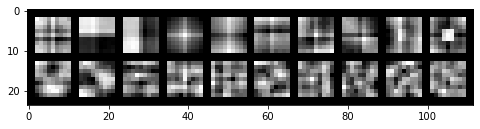

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx5/actsoftplus/lossmse/k9/bn_preTrue/model_seed0
lateral
[0.1498825  0.22505707 0.29424327 0.35600875 0.40140221 0.43949703
 0.47206556 0.50174694 0.52925271 0.55423679 0.57832425 0.60201811
 0.62328547 0.63874151 0.65247276 0.66575854 0.67795994 0.69009966
 0.70066163 0.71066957]


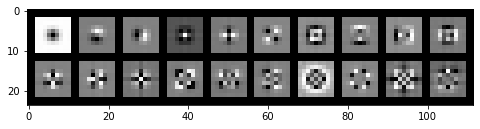

ff
[0.24616625 0.36280356 0.47435138 0.57992658 0.63751079 0.68579301
 0.71656816 0.74659858 0.77001909 0.79102528 0.80407484 0.81623717
 0.82640579 0.83454568 0.84248397 0.84907222 0.85530015 0.86097425
 0.86626105 0.87145995]


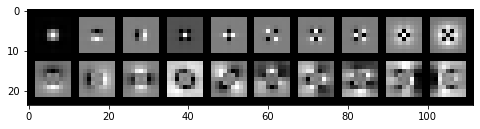

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx5/actsoftplus/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.17952589 0.27585246 0.32973732 0.37864289 0.42362929 0.45473304
 0.47949638 0.50415469 0.52612868 0.54740821 0.56587998 0.58384191
 0.60118972 0.61718337 0.63226482 0.64611889 0.65819967 0.66984482
 0.68102233 0.69130273]


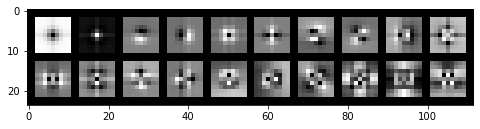

ff
[0.23027561 0.34612131 0.42109192 0.49143772 0.5525313  0.59025884
 0.62003296 0.64408716 0.66475671 0.68384019 0.70225037 0.71883303
 0.73343033 0.74599318 0.75595432 0.76521021 0.77440887 0.78346327
 0.79144946 0.79867228]


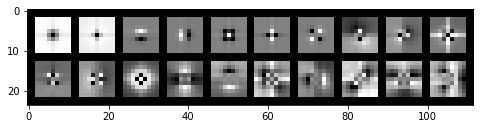

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx6/actrelu/lossmse/k9/bn_preTrue/model_seed0
lateral
[0.12318039 0.18926004 0.25402243 0.31392133 0.35905905 0.39670407
 0.42802105 0.45598002 0.48232251 0.50695774 0.53126043 0.55387911
 0.57345259 0.58862651 0.60252867 0.61549601 0.62809698 0.64045331
 0.65172505 0.66217744]


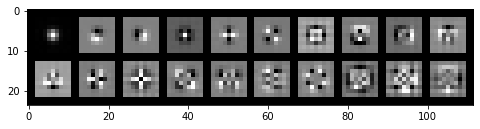

ff
[0.11766417 0.17500121 0.23134587 0.28575499 0.32003094 0.35084771
 0.3802437  0.40523724 0.42923797 0.45098141 0.47098726 0.49029078
 0.50808791 0.52473581 0.54049729 0.55600155 0.57076702 0.58508791
 0.59908987 0.61284307]


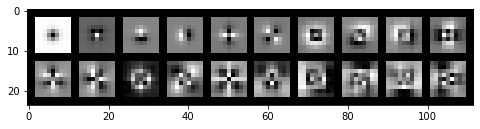

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx6/actrelu/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.24946298 0.29459485 0.333578   0.36874001 0.39040843 0.40416273
 0.41756546 0.43053344 0.44228907 0.45381882 0.46504103 0.47587718
 0.48618814 0.49607336 0.50576405 0.51529435 0.52446659 0.53344602
 0.54238981 0.5511919 ]


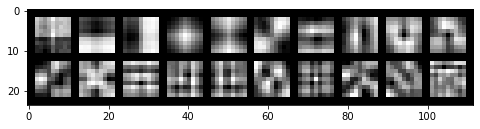

ff
[0.35513268 0.41061541 0.45534513 0.4916865  0.50972876 0.52301039
 0.53533146 0.5458654  0.55608401 0.56510258 0.57404568 0.5825688
 0.59102331 0.59943047 0.60750967 0.61523366 0.62267302 0.62987496
 0.63700652 0.6440274 ]


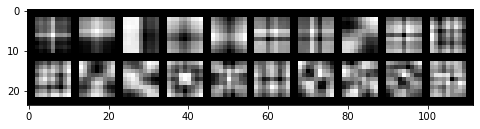

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx6/actsoftplus/lossmse/k9/bn_preTrue/model_seed0
lateral
[0.12320819 0.18931399 0.25408579 0.31393857 0.35911044 0.39676441
 0.42804975 0.45600463 0.48235536 0.50696175 0.53128551 0.55390833
 0.57347439 0.58864474 0.60254726 0.61551379 0.62811753 0.64047272
 0.65175348 0.66220558]


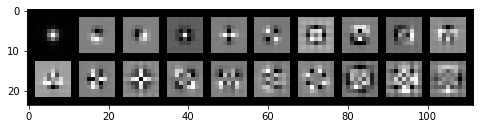

ff
[0.11816997 0.17630174 0.23270517 0.28710496 0.32146222 0.35232392
 0.38188652 0.40688135 0.43091881 0.45268628 0.47267705 0.49195305
 0.50973959 0.52639742 0.54218117 0.55768885 0.57244968 0.58676347
 0.60077285 0.61451935]


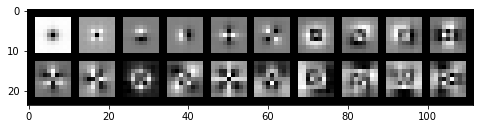

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx6/actsoftplus/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.13286778 0.20111088 0.2656446  0.32861158 0.37088792 0.40669378
 0.44104261 0.467971   0.49298704 0.51614686 0.5385239  0.55966721
 0.57991581 0.59758314 0.61150684 0.62442707 0.63653428 0.64803961
 0.65922166 0.67020725]


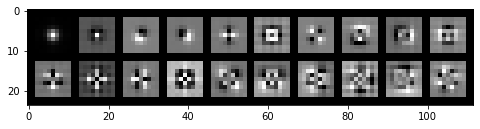

ff
[0.15068126 0.22858781 0.28077453 0.33015701 0.37557826 0.40570209
 0.43096976 0.45549659 0.47920627 0.4990632  0.51798415 0.53679211
 0.55401013 0.57045957 0.58551445 0.59997071 0.61403944 0.6266954
 0.63920524 0.6513984 ]


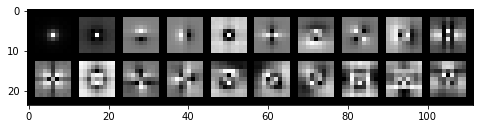

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx7/actrelu/lossmse/k9/bn_preTrue/model_seed0
lateral
[0.06467392 0.10081729 0.13403201 0.16591768 0.19173938 0.21427029
 0.23592014 0.25602242 0.27584971 0.29451359 0.31161882 0.32828193
 0.34430531 0.35950973 0.37456141 0.38932455 0.40392176 0.41823572
 0.43240237 0.4461059 ]


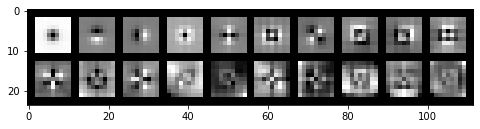

ff
[0.09616354 0.1433841  0.18794881 0.23076318 0.26076571 0.28752423
 0.31286812 0.33781752 0.3624425  0.3838408  0.40418432 0.42439872
 0.44413802 0.46362129 0.48192029 0.49918907 0.51519553 0.53055352
 0.54572978 0.56046047]


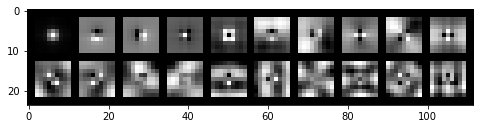

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx7/actrelu/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.21406403 0.2797597  0.32975996 0.37604935 0.40134921 0.41985719
 0.43646544 0.45237566 0.46666449 0.48057568 0.49380027 0.50587347
 0.51745063 0.52840226 0.53893676 0.54911417 0.55925911 0.56900452
 0.57855248 0.58805345]


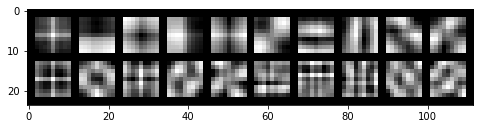

ff
[0.28309505 0.35010854 0.40455337 0.43796238 0.45995739 0.47446924
 0.48813273 0.50092567 0.51258393 0.52376513 0.5345597  0.54464017
 0.55438474 0.56371721 0.57291524 0.58188814 0.59066655 0.59911027
 0.60732918 0.61550735]


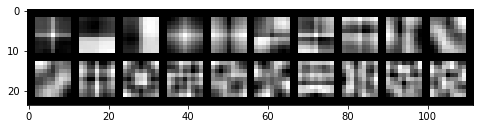

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx7/actsoftplus/lossmse/k9/bn_preTrue/model_seed0
lateral
[0.06471587 0.10087772 0.13411566 0.1660102  0.19186166 0.21439446
 0.23605811 0.25616548 0.27600974 0.29468225 0.31179619 0.32846441
 0.34449809 0.35971576 0.37476896 0.3895456  0.40415086 0.41847308
 0.43263517 0.44634371]


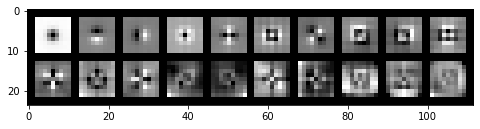

ff
[0.09618784 0.14343289 0.18802529 0.23098091 0.26101882 0.28778316
 0.31312754 0.3380881  0.36272828 0.38412956 0.40448357 0.42470346
 0.44446372 0.46394429 0.4822513  0.49952897 0.51553804 0.53091111
 0.54608229 0.56080916]


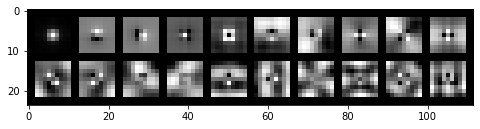

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx7/actsoftplus/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.2372397  0.29797052 0.35088744 0.39528867 0.42459931 0.44810962
 0.46683716 0.48467727 0.50170569 0.51820849 0.53366198 0.5475383
 0.56078849 0.57346407 0.58570672 0.59650916 0.60716234 0.61774991
 0.62804831 0.63824049]


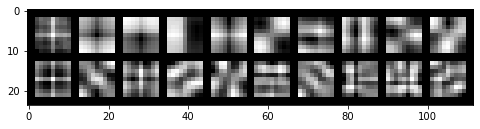

ff
[0.32840921 0.38200873 0.42460562 0.46398911 0.48881789 0.50530639
 0.5205968  0.5343989  0.54723904 0.55950555 0.57137267 0.58216219
 0.59272793 0.60256317 0.61230443 0.6219685  0.63080171 0.63952081
 0.64807985 0.65660799]


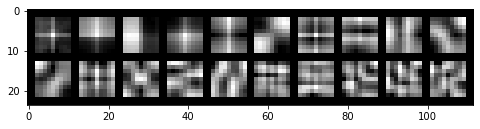

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx8/actrelu/lossmse/k9/bn_preTrue/model_seed0
lateral
[0.04731122 0.07659564 0.10139111 0.12575352 0.14777956 0.16899266
 0.19008925 0.21047229 0.23013487 0.24956944 0.26869542 0.28760781
 0.30608791 0.32444104 0.34234424 0.35979035 0.37701946 0.39393401
 0.41071589 0.42731585]


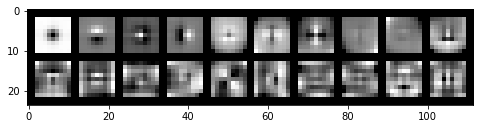

ff
[0.07117683 0.10829249 0.144171   0.17518985 0.20307168 0.23001595
 0.25530345 0.28024525 0.30492383 0.32725257 0.349217   0.37055656
 0.39149388 0.41176296 0.4317606  0.45066675 0.46906142 0.48719271
 0.50412425 0.52040843]


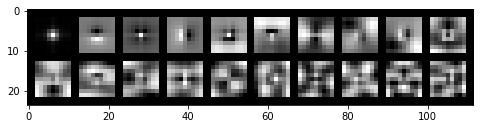

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx8/actrelu/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.18825903 0.25808237 0.31298804 0.35483298 0.38310305 0.40258982
 0.42110938 0.4361609  0.45063247 0.46472446 0.47864155 0.49062176
 0.50247096 0.5139113  0.52526624 0.53603887 0.54647891 0.55640001
 0.56614556 0.57570186]


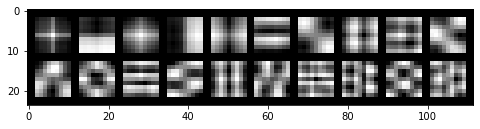

ff
[0.26461082 0.34103846 0.4046054  0.4535614  0.48050588 0.4998926
 0.51592995 0.53051707 0.5425944  0.55378619 0.5647436  0.57555828
 0.58617017 0.59594516 0.60549792 0.61468722 0.6237904  0.63247955
 0.64078166 0.64867341]


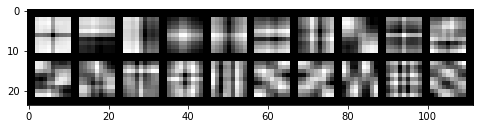

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx8/actsoftplus/lossmse/k9/bn_preTrue/model_seed0
lateral
[0.04732843 0.07662135 0.10142358 0.12579341 0.1478226  0.16903854
 0.19014643 0.21054853 0.23021317 0.24965218 0.26878635 0.28770339
 0.30618626 0.3245456  0.34244835 0.35989948 0.37713438 0.39405141
 0.41083824 0.4274436 ]


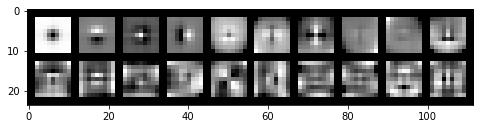

ff
[0.07140085 0.10854129 0.14445192 0.1754633  0.20336358 0.23032295
 0.25559699 0.28053232 0.30520006 0.32751877 0.34948661 0.37081726
 0.39175272 0.41201728 0.43202046 0.45092935 0.46931756 0.48743525
 0.50436266 0.52064186]


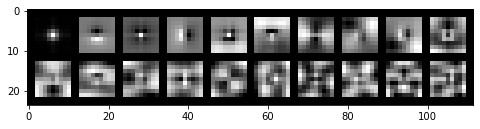

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx8/actsoftplus/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.22414208 0.2887802  0.34791762 0.38993828 0.42062774 0.44337579
 0.46366215 0.48005507 0.49610074 0.51168281 0.52706213 0.54002795
 0.55235834 0.56427317 0.57613132 0.58749612 0.59806123 0.60814061
 0.61805614 0.62764245]


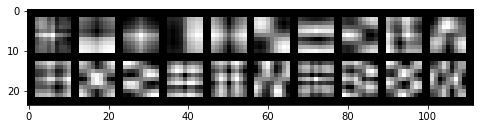

ff
[0.29770636 0.36380832 0.42036277 0.47330064 0.50270647 0.52287875
 0.54042048 0.55744559 0.57183015 0.58449788 0.59704768 0.60844087
 0.61935176 0.62982612 0.63977182 0.64955082 0.65918352 0.66861236
 0.67712331 0.68538831]


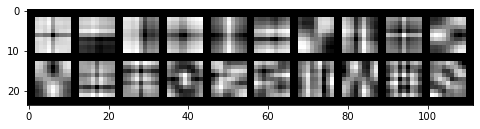

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx9/actrelu/lossmse/k9/bn_preTrue/model_seed0
lateral
[0.04987168 0.07907275 0.10428721 0.12807913 0.15169023 0.17443112
 0.19665336 0.21852171 0.23968011 0.26072117 0.2816718  0.30195328
 0.32218586 0.34194638 0.36148888 0.38089512 0.39951241 0.41774646
 0.43588319 0.45376854]


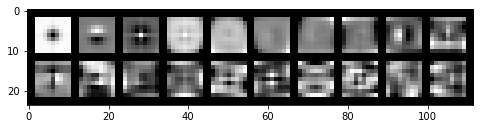

ff
[0.05664282 0.095113   0.1329206  0.16564917 0.19790598 0.22952801
 0.26094685 0.29023205 0.3189157  0.34627213 0.37108285 0.39570206
 0.41989214 0.44334719 0.46532241 0.48656666 0.5072016  0.52703104
 0.54611595 0.56478189]


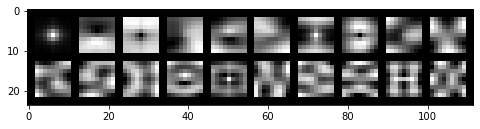

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx9/actrelu/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.16537439 0.22140025 0.27490465 0.31068965 0.33537104 0.35795983
 0.37946743 0.39643691 0.4125959  0.42792983 0.44265073 0.45646134
 0.46960068 0.48258713 0.49408616 0.50549129 0.51649101 0.52733687
 0.53807639 0.5481439 ]


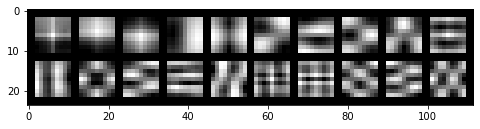

ff
[0.25584647 0.32623997 0.38503698 0.4331628  0.45912196 0.47894101
 0.49572343 0.51013583 0.52357669 0.53645116 0.54921656 0.56149058
 0.57246074 0.58283576 0.59294484 0.60295856 0.61233055 0.62161932
 0.6303095  0.63883061]


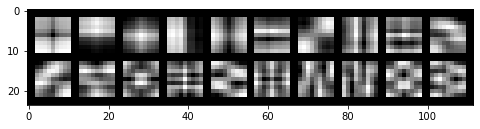

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx9/actsoftplus/lossmse/k9/bn_preTrue/model_seed0
lateral
[0.04939011 0.07856127 0.10356674 0.12737344 0.1510119  0.17372179
 0.19594666 0.21782177 0.2389924  0.26002311 0.28093602 0.30119254
 0.32139395 0.34115261 0.36067618 0.38004308 0.39867694 0.41685555
 0.43500835 0.45286645]


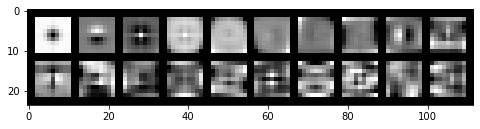

ff
[0.05611847 0.09440148 0.13210392 0.16476741 0.19697389 0.22857945
 0.25997815 0.28925776 0.31792162 0.34522617 0.37003875 0.3946283
 0.41881656 0.44224033 0.4642275  0.48545252 0.50611861 0.52597018
 0.54504851 0.56372846]


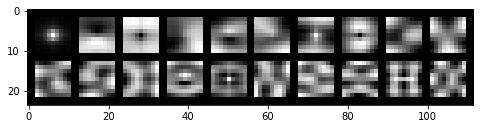

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx9/actsoftplus/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.18139125 0.23865522 0.29304251 0.3300849  0.3557634  0.38024524
 0.40218864 0.41991368 0.43654865 0.45227745 0.46728724 0.48145455
 0.49491211 0.5077642  0.51934018 0.53077512 0.54165814 0.55246157
 0.56324198 0.57322396]


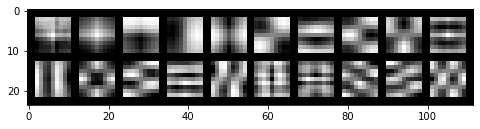

ff
[0.2746688  0.34225633 0.40243576 0.44799559 0.47506915 0.49529723
 0.51379091 0.52857874 0.54254831 0.55608308 0.56947376 0.58182671
 0.5932033  0.60374276 0.61412202 0.62412159 0.63369444 0.64284079
 0.65155866 0.66012628]


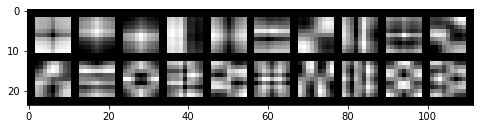

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx10/actrelu/lossmse/k9/bn_preTrue/model_seed0
lateral
[0.06024171 0.11165352 0.15564755 0.1968773  0.23772454 0.27693306
 0.31382078 0.34915785 0.38293012 0.41597904 0.4450459  0.47381592
 0.50207623 0.52764696 0.5519987  0.57503401 0.59563211 0.61591515
 0.63569381 0.65423171]


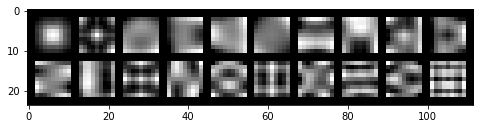

ff
[0.11869356 0.19067174 0.25524981 0.30917916 0.35657075 0.40002981
 0.43588657 0.47073322 0.50197217 0.53128914 0.55431631 0.57701852
 0.59923112 0.61797211 0.63507358 0.65179288 0.6670666  0.68203035
 0.69619107 0.71005586]


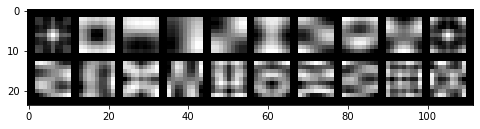

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx10/actrelu/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.13069856 0.22327653 0.27893233 0.31110026 0.33943076 0.36411014
 0.38526423 0.404558   0.4228413  0.43978534 0.45627076 0.47150286
 0.4854728  0.49910727 0.51190344 0.52378301 0.5355807  0.54697953
 0.55817144 0.56883923]


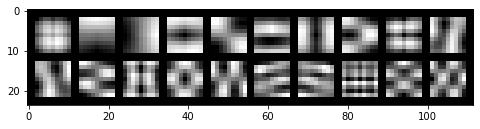

ff
[0.11673121 0.21350797 0.27043237 0.29919898 0.32261413 0.34262296
 0.36211423 0.3790014  0.39485585 0.40998337 0.42421077 0.4379561
 0.45164279 0.46490025 0.47785429 0.49019565 0.50223515 0.51399111
 0.52507146 0.5359019 ]


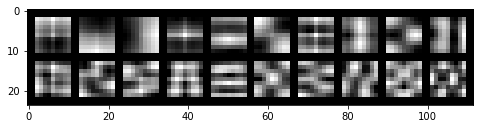

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx10/actsoftplus/lossmse/k9/bn_preTrue/model_seed0
lateral
[0.06023892 0.11178557 0.15581857 0.19705842 0.23792299 0.27716899
 0.31405199 0.34938883 0.38319934 0.41624006 0.44533045 0.47411565
 0.50236309 0.5279365  0.55228164 0.5752999  0.59589597 0.6161701
 0.63594697 0.65452022]


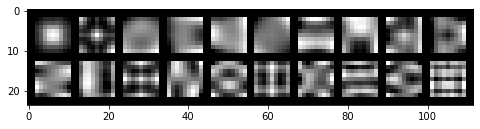

ff
[0.11854463 0.19042936 0.25498667 0.30891466 0.35633182 0.39978162
 0.43566563 0.47051187 0.50176854 0.53112022 0.55416902 0.57686637
 0.59910313 0.61786421 0.63495638 0.65168197 0.66696964 0.68195078
 0.69612497 0.71000736]


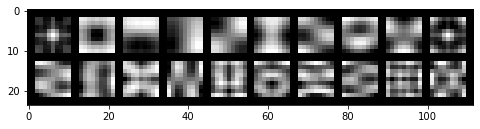

imagenet_val+first500+everything/PredNetBpE_3CLS_sep2/baseidx10/actsoftplus/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.16528915 0.25733433 0.31487005 0.34685588 0.37634891 0.4012091
 0.42213068 0.44147654 0.45991007 0.47635136 0.49239928 0.50727811
 0.52104478 0.53414609 0.54634541 0.55806354 0.5695954  0.58067544
 0.59126441 0.6013639 ]


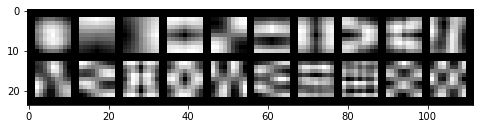

ff
[0.14696974 0.24477543 0.30163269 0.33191207 0.35578364 0.37662828
 0.39711805 0.41444028 0.43089081 0.44575339 0.46012671 0.47387523
 0.48753259 0.50057719 0.51352647 0.52589816 0.53784499 0.54908023
 0.55978212 0.57032288]


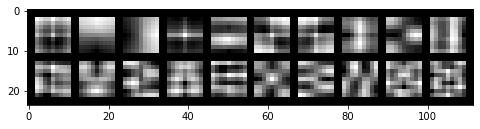

44


In [13]:
collect_all()